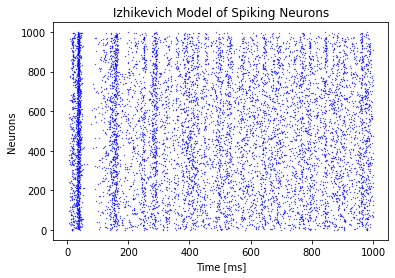

In [15]:
# Izhikevich Model of Spiking Neurons
# Originally created by Eugene M. Izhikevich, February 25, 2003
# https://www.izhikevich.org/publications/net.m : Izhikevich MATLAB code
 
import numpy as np
import math
import matplotlib.pyplot as plt
 
 
#Excitatory neurons    
Ne=800               
re=np.random.random((Ne, 1))        #to produce variability 
 
 
#Inhibitory neurons
Ni=200;
ri=np.random.random((Ni, 1))        #to produce variability 
 
 
 
a=np.concatenate((0.02*np.ones((Ne,1)),0.02+0.08*ri))                                       #Neuronal parameters       
b=np.concatenate((0.2*np.ones((Ne,1)),0.25-0.05*ri))                                        #Neuronal parameters
c=np.concatenate((-65+(15*np.square(re)),-65*np.ones((Ni,1))))                              #Neuronal parameters
d=np.concatenate((8-6*np.square(re),2*np.ones((Ni,1))))                                     #Neuronal parameters
S=np.concatenate((0.5*np.random.random((Ne+Ni,Ne)), -np.random.random((Ne+Ni,Ni))), axis=1) #random weight matrix
v=-65*np.ones((Ni+Ne,1))                                                                    #Initial values of v
u=b*v                                                                                       #Initial values of u


 
 
for t in range(0,1000):                                                                                       #1000 ms of network activity in time steps of 1 ms
  I=np.concatenate((5*np.random.normal(0, 1, size=(Ne,1)), 2*np.random.normal(0, 1, size=(Ni,1))), axis=0)    # Normally distributed random inputs
  spike_index=np.where(v>=30)[0]                                                                              #indices of spikes
  f=np.size(spike_index,0) 
  fired=spike_index[:]                                                                                        #array contaning the indices of all the spikes occured in the time range
  
 
  if f!=0:                                                                #condition to proceed if and only if neurons has fired
    t=np.transpose(np.array([t+0*fired]))                                 #record of time as when the neuron fired
    spike=np.transpose(np.array([fired]))                                 #index of places where the neurons fired in the above time range
    firings=np.concatenate((t,spike), axis=1)                                 #combined record of index and time of when the neurons fired
    plt.scatter(firings[:,0],firings[:,1],s=0.1 ,color='blue')            #plotting all the firings in the time range

    i=0
    while i<spike.size:
      index=int(spike[i])                  #value of index where the firings occured
      v[index]=c[index]                     #updating the firing node potential                        
      u[index]=u[index]+d[index]            #updating the recovery variable
      k=I+S                                 #addition of the input from the spiking neurons to the external input
      I=k[:,index].reshape(1000,1)
      i+=1

    

  v=v+(0.04*(v*v)+5*v+140-u+I)             #updating according to Euler Scheme
  u=u+a*(b*v-u)




#plotting and labelling the results
plt.title("Izhikevich Model of Spiking Neurons")
plt.ylabel("Neurons")
plt.xlabel("Time [ms]")
plt.show()
